### Student Information
Name: David Albrekt

Student ID: x1120011

GitHub ID: D-Albrekt

In [ ]:
# Answer here


In [ ]:
# Answer here


---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [ ]:
### Init blockt to create the panda DF X
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
# my functions
import sys
sys.path.append('../')
import helpers.data_mining_helpers as dmh
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
X[(X['category'] > 2) | (X['category'] < 1)][::150]
#In this example it is pretty weird to use
# this kind of notation, but if category instead would have been
# Likes or similair, then you maybe wants to see text with more than
# 50 likes for example. 
# We also se multiple conditions in use here.

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

In [ ]:
NA_df['missing_example'].isnull()

In [ ]:
# Answer here
#The df.isnull() funciton can only detect missing values in the form of
# the python datatype None, np.nan, and also when the value is 
# missing(Since it then becomes None). This is why 0,1,4 becomes true,
# however, for 2,3,5 there is a saved string in which makes the is.null()
# function belive that there are a stored value and therefore labels it as false. 

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [ ]:
# Answer here
'''
There are two main changes that occcours from the sampling (x --> x_sample) and that is
 1. The amount of records (length) get reduced to 1000 compared to the previous 2257
 2. The order of the records is randomized, hence it is not the first 1 - 1000 records who are selected
    instead it is randomized like record 561 first then record 241 and so on until the total amount of records is 1000.
'''


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [ ]:
#Time to import matplot lib and create X_sample to do EX 8 
import matplotlib.pyplot as plt
%matplotlib inline
X_sample = X.sample(n=1000,random_state=42) #random state


In [ ]:
# Answer ex 8
X_sample
upper_bound = max(X.category_name.value_counts() + 50) 
barwidth = 0.2
x = np.arange(len(categories))
print()

plt.figure(figsize=(8,3)) #Set figure size
plt.ylim([0, upper_bound])
plt.bar(x - barwidth/2, X.category_name.value_counts(), barwidth, color='b') #Condition blue bar
plt.bar(x + barwidth/2, X_sample.category_name.value_counts(), barwidth, color='orange') #Conditions O bar
plt.title('My plot of the Category distribution')
plt.xlabel('Categories')
plt.ylabel('Amount of articles')
plt.xticks(x, categories) # name the X bars.
plt.legend(['Original data', 'Sampled data']) #Create legend
plt.show()


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
indices = np.where(X_counts[4:5].toarray() == 1)[1] #Get the indexes of all elements == 1
count_vect.get_feature_names_out()[indices[1]] #Print the second 1. 

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# Answer here
new_sample_x = X.sample(n=50,random_state=42)
plot_y = ["doc_"+ str(i) for i in list(new_sample_x.index)] #random state.index)[]]
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[new_sample_x.index]]
plot_z = X_counts[0:50, 0:50].toarray() #X_counts[how many documents, how many terms]


import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#As seen here, already when selecting 50 dcuments and 50 terms it take some time to create the heatmap. 
# Here I did a sampling to make the representation somewhat more random. but still we see that it is very sparse.
#Other representation would be more beneficial if one would like to know and visualize the most common words for example.
# In that case, maybe a bar diagram would be beneficial. 
#The prefered visualization method is dependent on what type of information one would like to find. However, with this big
# spare matrix, I would't say that much conclusions can be drawn from the heatmap more than it is really sparse. 

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


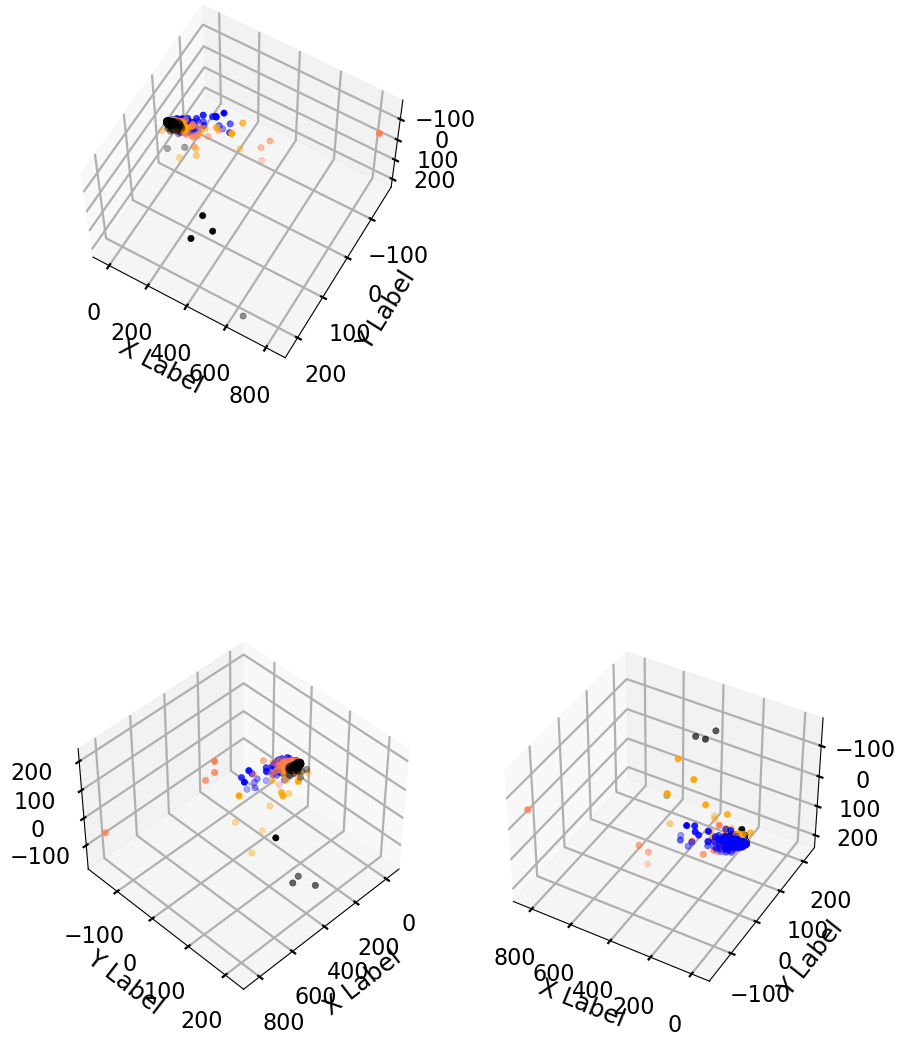

In [177]:
# Answer here
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

col = ['coral', 'blue', 'black', 'orange']

# plot

from mpl_toolkits import mplot3d
#= plt.figure(figsize = (10,10))
fig = plt.figure(figsize = (10,30))
ax = fig.add_subplot(1,2,1, projection='3d')
#axs[0] = plt.axes(projection='3d')



for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs,  c = c)


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(45, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs,  c = c)


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(-140, 60)

ax = fig.add_subplot(2,2,1, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs,  c = c)


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.view_init(240,240)
plt.show()